# Chapter 1 Purely Quantitative & Logic Questions

## 1.1

### You are given two glass jugs. Each contains the same volume V of liquid. One jug contains pure alcohol, and the other jug contains pure water. A modest quantity, Q, of water is poured from the water jug into the alcohol jug, which is then thoroughly mixed. The same modest quantity, Q, of (now diluted) alcohol is then poured back into the water jug to equalize the volumes of the jugs at their initial levels.

### The initial concentration of alcohol in the alcohol jug equals the inital concentration of water in the water jug (at 100%). What is the relationship between the final concentrations of alcohol in the alcohol jug and the water in the water jug?

#### Answer

They have the same relationship.

In [103]:
from statistics import mean

# change v and q to change the simulation
v = 125
q = 2


water = [0] * v
alcohol = [1] * v

# Remove the water from the water jug
transfered_water = [water.pop() for _ in range(q)]

# add the water
alcohol.extend(transfered_water)

# mix the water
alcohol = [mean(alcohol) for molecule in alcohol]

# remove q of the mixture
transfered_alc = [alcohol.pop() for _ in range(q)]

# add it back to the water
water.extend(transfered_alc)

# count the water in the water
water_count = 0
for i in water:
    water_count += 1-i # opposite of the amount of alcohol
print(f"{water_count} molecules of water in the water jug.")


# count the alcohol in the alcohol
alcohol_count = 0
for i in alcohol:
    alcohol_count += i 
print(f"{alcohol_count} molecules of alcohol in the alcohol jug.")



123.03149606299212 molecules of water in the water jug.
123.03149606299246 molecules of alcohol in the alcohol jug.


## 1.2

### There are two bells. One rings five times per minute, and the other rings four times per minute. If they start at the same time, how long will it be until they next ring together?

#### Answer

In [129]:
def lcm(a, b):
    big = max(a, b)
    little = min(a, b)
    
    multiple = big  # Start with the larger number
    while multiple % little != 0:
        multiple += big  # Keep adding big until it is divisible by little
    
    return multiple

minute = 60

# bell one, seconds per ring (spr)
b1_spr = minute / 5

# bell two, seconds per ring (spr)
b2_spr = minute / 4

print(f"There are {lcm(b1_spr, b2_spr)} seconds until the next ring.")

There are 60.0 seconds until the next ring.


## 1.3

### What is the sum of the integers from 1 to 100?

#### Answer

In [131]:
# brute force way
count = 0
for i in range(1, 101):
    count += i
print(count)

5050


In [158]:
# the way you should solve it without code
import numpy as np

# think of what the list of numbers from 1-100 looks like
x = np.arange(1,101)

# recognize that 1 + 100 = 101, 2 + 99 = 101
# split the list in 2 and add the components
x1 = x[:50]
x2 = np.flip(x[50:])

# get the list of 101
result = x1 + x2

# there are 100/2 amount of pair of numbers that sum to 101
amount = len(result)

# multiply 100/2 * 101
print(f"{result[0] * amount} is the sum of numbers from 1 to 100.")

5050 is the sum of numbers from 1 to 100.


## 1.4

### An old syle analogue clock falls off the wall and the face breaks into three pieces. The numbers on each piece add to the same total. Describe the pieces.

#### Answer

In [164]:
import numpy as np
clock = np.arange(1,13)
print(f'Sum of each clock piece is {sum(clock)//3}')
piece1 = []
piece2 = []
piece3 = []
while sum(piece1) != 26 and sum(piece2) != 26 sum(piece3) != 26:
    for i in clock:
        x = np.random.randint(1,len(clock)):
            y = np.random.choice
    

Sum of each clock piece is 26


## 1.5

# Chapter 4 Statistics Questions

## 4.1

### Suppose we draw two random numbers X and Y each distributed uniform on the interval [0,1]. If X and Y are independent, what is the probability that their product is greater than 1/2?

### Answer

In [165]:
import matplotlib.pyplot as plt
import sympy as sp

Probability is 0.153426409720027 of x*y > 0.5


/var/folders/67/k52p4h0s1f1bm45kd56y13900000gn/T/ipykernel_18706/2790552129.py:2: RuntimeWarning: divide by zero encountered in divide
  y = 0.5/x


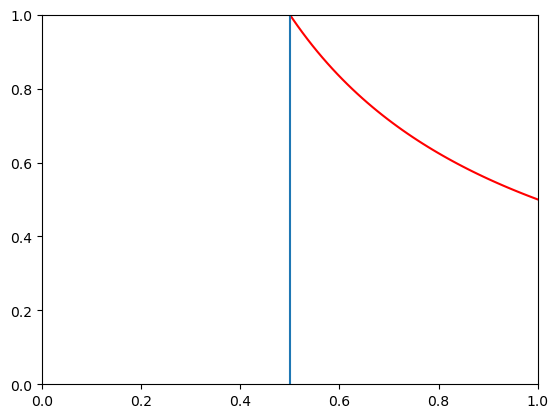

In [191]:
x = np.linspace(0,1,100)
y = 0.5/x

plt.plot(x,y,'r')
plt.ylim(0,1)
plt.xlim(0,1)
plt.vlines(0.5, 0, 1)

x = sp.Symbol('x')

print(f'Probability is {0.5 - sp.integrate(0.5/x, (x, 0.5, 1))} of x*y > 0.5')


In [213]:
iterations = 1000000
count = 0
for i in range(iterations):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    if x * y > 0.5:
        count += 1
print(count/iterations)

0.153146


## 4.2

### Consider the following game. The player tosses a die once only. The playoff is $1 for each "dot" on the upturned face. Assuming a fair die, at what level should you set the ticket price for this game?

### Answer

In [767]:
winnings = [1,2,3,4,5,6]
probs = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

print(f'Set the price at {np.average(winnings, weights=probs)} if you want to break even. Anything more will be profit.')

Set the price at 3.5000000000000004 if you want to break even. Anything more will be profit.


In [768]:
iterations = 10000
count = 0
for i in range(iterations):
    count += np.random.choice(winnings)
print(count/iterations)

3.5187


## 4.3

### I am going to toss four coins. You are going to toss five coins. You win if you get strictly more heads than I do. What is the probability that you win?

### Answer

In [301]:
iterations = 1000
wins = 0

for i in range(iterations):       
    me = [np.random.randint(0,2) for i in range(4)]
    you = [np.random.randint(0,2) for i in range(5)]

    if sum(you) > sum(me):
        wins += 1
    
print(wins/iterations)

0.49


In [539]:
iterations = 1000000
count = 0

for i in range(iterations):
    chosen = 0
    for i in range(3):
        x = np.random.randint(1,7)
        if i == 0:
            if x > 4:
                chosen = x
                break
        if i == 1:
            if x > 3:
                chosen = x
                break
        if i == 2:
            chosen = x
    count += x

print(count/iterations)

4.667436


## 4.22

### You have a large jar containing 999 fair pennies and one two-headed penny. Suppose you pick one coin out of the jar and flip it 10 times and get all heads. What is the probability that the coin you chose is the two-headed one?

### Answer

In [609]:
# P(A|B) = P(B|A) * P(A) / P(B)

# P(A|B) = probability you have the biased penny given you get 10 heads in a row
# P(B|A) = probability you get 10 heads given you have the biased penny
# P(A) probability you draw the biased penny
# P(B) total probability you get 10 heads in a row (not straight forward)

# P(A)
p_draw_biased = 1/1000

# P(~A)
p_draw_fair = 999/1000

# P(B|~A)
p_10_head_with_fair = 1/2**10

# P(B|A)
p_10_head_with_biased = 1

# P(B) = P(B|A)*P(A) + P(B|~A)*P(~A)

p_all_heads_total = p_10_head_with_biased*p_draw_biased + p_10_head_with_fair*p_draw_fair
print(p_10_head_with_biased * p_draw_biased / p_all_heads_total)

0.5061789421651013


In [610]:
iterations = 1000000

biased = 0
fair = 0
for i in range(iterations):
    p = ['f']*999
    p.append('b')

    choice = np.random.choice(p)

    flips = []
    for i in range(10):
        if choice == 'f':
            flips.append(np.random.randint(0,2))
        else:
            flips.append(0)
    if sum(flips) == 0:
        if choice == 'b':
            biased += 1
        else:
            fair += 1
print(biased / (biased + fair))

0.5046826222684704


## 4.28

### What is the expected number of tosses of an unfair coin needed to get two heads in a row (assume probability p of a head)? Same questions with three heads in a row.

In [766]:
def expected_flips(n, p):
    numerator = sum(p**k for k in range(n))  # Sum of 1 to p^(n-1)
    denominator = p**n  # p^n
    return numerator / denominator

# Example with n = 3 consecutive heads, p = 0.3 probability of heads
n = 2
p = 1/13

expected_value = expected_flips(n, p)
print(expected_value)


181.99999999999997


In [763]:
amount = 2
iterations = 100000

p = 1/13

flip_count = []

for i in range(iterations):
    count = 0
    flips = []

    while sum(flips) != amount:
        x = np.random.choice([0,1], p=[1-p, p])
        if x == 1:
            flips.append(1)
        else:
            flips.clear()
        count += 1
    flip_count.append(count)
print(np.average(flip_count))

181.29117
